In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
dataset=pd.read_csv("/health care diabetes.csv")

In [0]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
dataset.shape

(768, 9)

In [0]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

## Checkpoint 1

In [0]:
df=dataset.copy()

In [0]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64





---


# **Treating zero values**

---




In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**missing** **values**, as given 0 is considered as missing value.

In [0]:
print(df[df.Glucose==0]['Glucose'].count())
print(df[df.BloodPressure==0]['BloodPressure'].count())
print(df[df.SkinThickness==0]['SkinThickness'].count())
print(df[df.Insulin==0]['Insulin'].count())
print(df[df.BMI==0]['BMI'].count())

5
35
227
374
11


In [0]:
print(df['Glucose'].mean())
print(df['BloodPressure'].mean())
print(df['SkinThickness'].mean())
print(df['Insulin'].mean())
print(df['BMI'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667
31.992578124999977


as we can see for insulin mean is far more divert from the median that is due to outliner. so we are going to median function to fill the zero values.

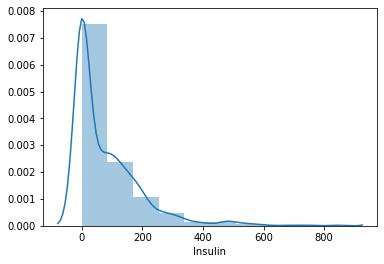

In [0]:
#sns.catplot(x="Insulin",kind='count',data=df)
sns.distplot(df["Insulin"],kde=True,bins=10)

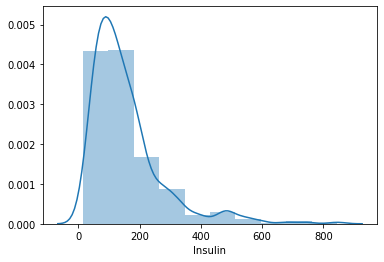

In [0]:
sns.distplot(df[df.Insulin!=0]["Insulin"],kde=True,bins=10)

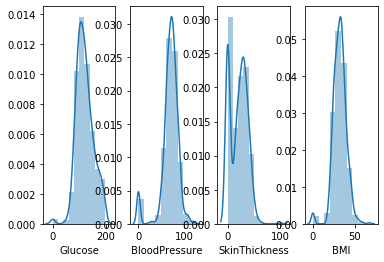

In [0]:
fig, axs = plt.subplots(ncols=4)
sns.distplot(df["Glucose"],kde=True,bins=10,ax=axs[0])
sns.distplot(df["BloodPressure"],kde=True,bins=10,ax=axs[1])
sns.distplot(df["SkinThickness"],kde=True,bins=10,ax=axs[2])
sns.distplot(df["BMI"],kde=True,bins=10,ax=axs[3])

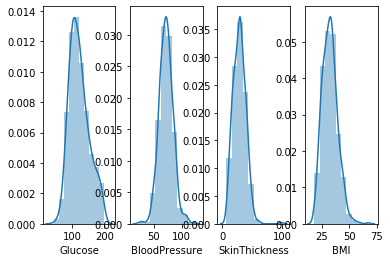

In [0]:
fig, axs = plt.subplots(ncols=4)
sns.distplot(df[df.Glucose!=0]["Glucose"],kde=True,bins=10,ax=axs[0])
sns.distplot(df[df.BloodPressure!=0]["BloodPressure"],kde=True,bins=10,ax=axs[1])
sns.distplot(df[df.SkinThickness!=0]["SkinThickness"],kde=True,bins=10,ax=axs[2])
sns.distplot(df[df.BMI!=0]["BMI"],kde=True,bins=10,ax=axs[3])

**as we can see that due zero values we are restrain from getting PDF.**

In [0]:
df.loc[df.Glucose == 0 ,'Glucose'] = df["Glucose"].median()
df["BloodPressure"]=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].map( lambda x : df.SkinThickness.mean() if x == 0 else x)
df.loc[df.Insulin == 0 ,'Insulin'] = df["Insulin"].median()
df.loc[df.BMI == 0 ,'BMI'] = df["BMI"].median()


**count (frequency) plot** describing the data types and the count of variables

In [0]:
var=pd.DataFrame(df.dtypes,columns={'type'})
var=var.reset_index()
var.drop(["index"],axis=1,inplace=True)
var

,type
0,int64
1,float64
2,int64
3,float64
4,float64
5,float64
6,float64
7,int64
8,int64


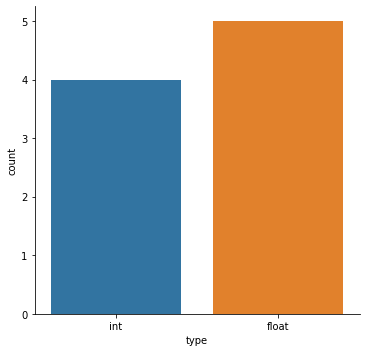

In [0]:
var.loc[var.type=="float64",'type']="float"
var.loc[var.type=="int64",'type']="int"
sns.catplot(x="type",data=var,kind="count")

Checking the **balance of the data** by plotting the count of outcomes by their value

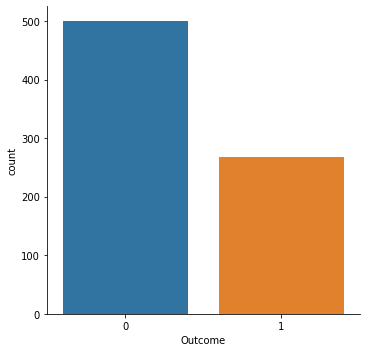

In [0]:
sns.catplot(x="Outcome",data=df,kind='count')

***we can see that the data is imbalanced***

As we have less number of observation(rows) we will be using over sampling method to overcome imbalanced dataset.

Creating **scatter charts** between the pair of variables

# Checkpoint 2

In [0]:
df1=df.copy()

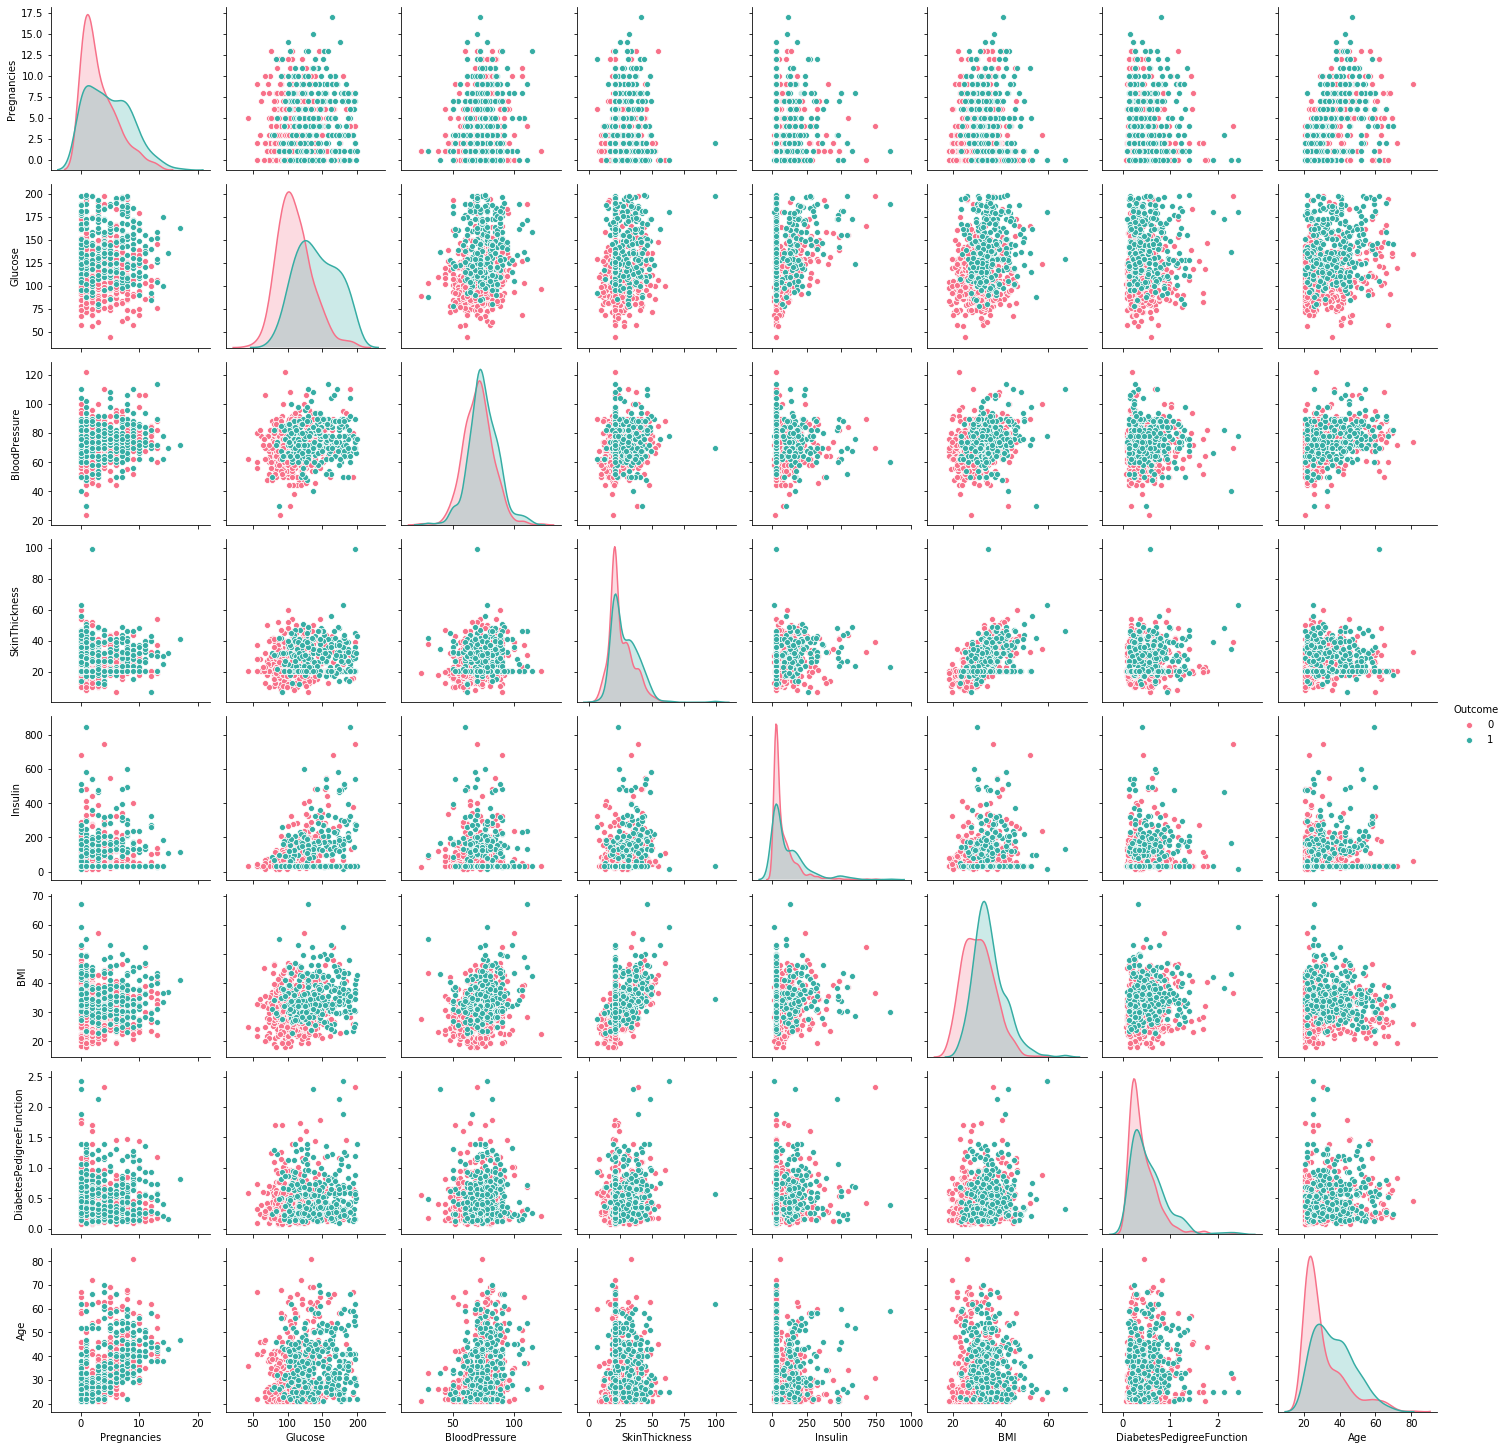

In [0]:
sns.pairplot(df1,hue="Outcome",palette="husl")

using heatmap for the correlation between columns

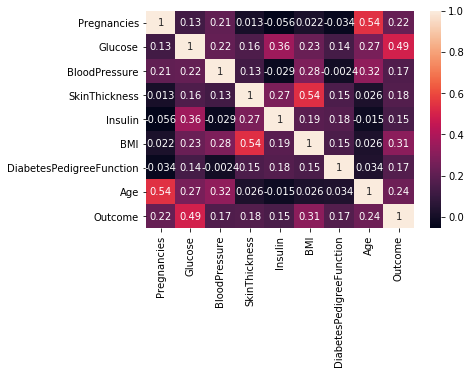

In [0]:
sns.heatmap(df1.corr(method="pearson"),annot=True)

In [0]:
df1[['Pregnancies','Outcome']].groupby(['Pregnancies'],as_index=False).mean().sort_values(by='Outcome', ascending=False)

,Pregnancies,Outcome
16,17,1.000000
15,15,1.000000
14,14,1.000000
9,9,0.642857
11,11,0.636364
8,8,0.578947
7,7,0.555556
13,13,0.500000
12,12,0.444444
10,10,0.416667


In [0]:
df1.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [0]:
df1['AgeBand'] = pd.cut(df1['Age'], 5)
df1[['AgeBand', 'Outcome']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Outcome
0,"(20.94, 33.0]",0.257384
1,"(33.0, 45.0]",0.500000
2,"(45.0, 57.0]",0.578947
3,"(57.0, 69.0]",0.333333
4,"(69.0, 81.0]",0.333333


In [0]:
  df1.loc[ df1['Age'] <= 33, 'Age'] = 0
  df1.loc[(df1['Age'] > 33) & (df1['Age'] <= 45), 'Age'] = 1
  df1.loc[(df1['Age'] > 45) & (df1['Age'] <= 57), 'Age'] = 2
  df1.loc[(df1['Age'] > 57) & (df1['Age'] <= 69), 'Age'] = 3
  df1.loc[ df1['Age'] > 69, 'Age']=5

In [0]:
df1.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeBand
0,6,148.0,72,35.000000,30.5,33.6,0.627,2,1,"(45.0, 57.0]"
1,1,85.0,66,29.000000,30.5,26.6,0.351,0,0,"(20.94, 33.0]"
2,8,183.0,64,20.536458,30.5,23.3,0.672,0,1,"(20.94, 33.0]"
3,1,89.0,66,23.000000,94.0,28.1,0.167,0,0,"(20.94, 33.0]"
4,0,137.0,40,35.000000,168.0,43.1,2.288,0,1,"(20.94, 33.0]"


In [0]:
df1.drop(['AgeBand'],axis=1,inplace=True)

#checkpoint

In [0]:
df2=df1.copy()

In [0]:
df2['glucosemeter'] = pd.cut(df2['Glucose'],5)
df2[['glucosemeter', 'Outcome']].groupby(['glucosemeter'], as_index=False).mean().sort_values(by='glucosemeter', ascending=True)

,glucosemeter,Outcome
0,"(43.845, 75.0]",0.000000
1,"(75.0, 106.0]",0.125000
2,"(106.0, 137.0]",0.340351
3,"(137.0, 168.0]",0.572464
4,"(168.0, 199.0]",0.847222


In [0]:
  df2.loc[ df2['Glucose'] <= 75.0, 'Glucose'] = 0
  df2.loc[(df2['Glucose'] > 75.0) & (df2['Glucose'] <= 106.0), 'Glucose'] = 1
  df2.loc[(df2['Glucose'] > 106.0) & (df2['Glucose'] <= 137.0), 'Glucose'] = 2
  df2.loc[(df2['Glucose'] > 137.0) & (df2['Glucose']<=168.0), 'Glucose'] = 3
  df2.loc[df2['Glucose']>168.0 ,'Glucose']=4

In [0]:
df2.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucosemeter
0,6,3.0,72,35.000000,30.5,33.6,0.627,2,1,"(137.0, 168.0]"
1,1,1.0,66,29.000000,30.5,26.6,0.351,0,0,"(75.0, 106.0]"
2,8,4.0,64,20.536458,30.5,23.3,0.672,0,1,"(168.0, 199.0]"
3,1,1.0,66,23.000000,94.0,28.1,0.167,0,0,"(75.0, 106.0]"
4,0,2.0,40,35.000000,168.0,43.1,2.288,0,1,"(106.0, 137.0]"
5,5,2.0,74,20.536458,30.5,25.6,0.201,0,0,"(106.0, 137.0]"
6,3,1.0,50,32.000000,88.0,31.0,0.248,0,1,"(75.0, 106.0]"
7,10,2.0,72,20.536458,30.5,35.3,0.134,0,0,"(106.0, 137.0]"
8,2,4.0,70,45.000000,543.0,30.5,0.158,2,1,"(168.0, 199.0]"
9,8,2.0,96,20.536458,30.5,32.0,0.232,2,1,"(106.0, 137.0]"


In [0]:
df2.drop(['glucosemeter'],axis=1,inplace=True)

In [0]:
df2['Blood'] = pd.cut(df2['BloodPressure'],4)
df2[['Blood', 'Outcome']].groupby(['Blood'], as_index=False).mean().sort_values(by='Blood', ascending=True)

,Blood,Outcome
0,"(23.902, 48.5]",0.187500
1,"(48.5, 73.0]",0.302730
2,"(73.0, 97.5]",0.400000
3,"(97.5, 122.0]",0.578947


In [0]:
  df2.loc[ df2['BloodPressure'] <= 48.5, 'BloodPressure'] = 0
  df2.loc[(df2['BloodPressure'] > 48.5) & (df2['BloodPressure'] <= 73), 'BloodPressure'] = 1
  df2.loc[(df2['BloodPressure'] > 73) & (df2['BloodPressure'] <= 97.5), 'BloodPressure'] = 2
  df2.loc[df2['BloodPressure'] >97.5, 'BloodPressure'] = 3

In [0]:
df2.drop(['Blood'],axis=1,inplace=True)

In [0]:
df2.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,3.0,1,35.000000,30.5,33.6,0.627,2,1
1,1,1.0,1,29.000000,30.5,26.6,0.351,0,0
2,8,4.0,1,20.536458,30.5,23.3,0.672,0,1
3,1,1.0,1,23.000000,94.0,28.1,0.167,0,0
4,0,2.0,0,35.000000,168.0,43.1,2.288,0,1


In [0]:
df2['skin'] = pd.cut(df2['SkinThickness'],5)
df2[['skin', 'Outcome']].groupby(['skin'], as_index=False).mean().sort_values(by='skin', ascending=True)

,skin,Outcome
0,"(6.908, 25.4]",0.295082
1,"(25.4, 43.8]",0.401338
2,"(43.8, 62.2]",0.500000
3,"(62.2, 80.6]",1.000000
4,"(80.6, 99.0]",1.000000


In [0]:
df2.loc[ df2['SkinThickness'] <= 25.4, 'SkinThickness'] = 0
df2.loc[(df2['SkinThickness'] > 25.4) & (df2['SkinThickness'] <= 43.8), 'SkinThickness'] = 1
df2.loc[(df2['SkinThickness'] > 43.8) & (df2['SkinThickness'] <= 62.2), 'SkinThickness'] = 2
df2.loc[df2['SkinThickness'] >62.2, 'SkinThickness'] = 3

In [0]:
df2.drop(['skin'],axis=1,inplace=True)

In [0]:
df2['bmi'] = pd.cut(df2['BMI'],5)
df2[['bmi', 'Outcome']].groupby(['bmi'], as_index=False).mean().sort_values(by='bmi', ascending=True)


,bmi,Outcome
0,"(18.151, 27.98]",0.126761
1,"(27.98, 37.76]",0.402500
2,"(37.76, 47.54]",0.482014
3,"(47.54, 57.32]",0.785714
4,"(57.32, 67.1]",1.000000


In [0]:
df2.loc[ df2['BMI'] <= 27.98, 'BMI'] = 0
df2.loc[(df2['BMI'] > 27.98) & (df2['BMI'] <= 47.54), 'BMI'] = 1
df2.loc[df2['BMI'] >47.54, 'BMI'] = 3

In [0]:
df2.drop(['bmi'],axis=1,inplace=True)

In [0]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,3.0,1,1.0,30.5,1.0,0.627,2,1
1,1,1.0,1,1.0,30.5,0.0,0.351,0,0
2,8,4.0,1,0.0,30.5,0.0,0.672,0,1
3,1,1.0,1,0.0,94.0,1.0,0.167,0,0
4,0,2.0,0,1.0,168.0,1.0,2.288,0,1


In [0]:
from sklearn.preprocessing import StandardScaler
df2['Insulin']=StandardScaler().fit_transform(df2['Insulin'].values.reshape(-1, 1))


In [0]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,3.0,1,1.0,-0.608201,1.0,0.627,2,1
1,1,1.0,1,1.0,-0.608201,0.0,0.351,0,0
2,8,4.0,1,0.0,-0.608201,0.0,0.672,0,1
3,1,1.0,1,0.0,-0.006185,1.0,0.167,0,0
4,0,2.0,0,1.0,0.695378,1.0,2.288,0,1


In [0]:
x=df2.iloc[:,:-1]

In [0]:
y=df2.iloc[:,-1]

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [0]:
from imblearn.combine import SMOTETomek

In [0]:
smk = SMOTETomek(random_state=22)
X_res,y_res=smk.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
x_train_res,x_test_res,y_train_res,y_test_res=train_test_split(X_res,y_res,test_size=0.2)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier_res=KNeighborsClassifier()

In [0]:
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.6558441558441559

In [0]:
classifier_res.fit(x_train_res,y_train_res)
classifier_res.score(x_test_res,y_test_res)

0.7150537634408602

In [0]:
for i in range(10):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
  classifier=KNeighborsClassifier()
  classifier.fit(x_train,y_train)
  print(classifier.score(x_test,y_test))

0.6753246753246753
0.7727272727272727
0.7142857142857143
0.7337662337662337
0.7597402597402597
0.7272727272727273
0.7142857142857143
0.7142857142857143
0.7402597402597403
0.6818181818181818


In [0]:
for i in range(10):
  x_train_res,x_test_res,y_train_res,y_test_res=train_test_split(X_res,y_res,test_size=0.2)
  classifier_res=KNeighborsClassifier()
  classifier_res.fit(x_train_res,y_train_res)
  print(classifier_res.score(x_test_res,y_test_res))
  

0.7258064516129032
0.7580645161290323
0.7741935483870968
0.7688172043010753
0.7634408602150538
0.7365591397849462
0.7258064516129032
0.7795698924731183
0.8225806451612904
0.7096774193548387


as we can see there is noticable variation in the accuracy as we use different train and test set.we will use k-fold method here.

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [0]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [0]:
from sklearn.model_selection import KFold
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X_res, y_res, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

  Name     Score
0  KNN  0.775047
1  SVC  0.755388
2   LR  0.775993
3   DT  0.770781
4  GNB  0.740147
5   RF  0.834677


In [0]:
smk = SMOTETomek(random_state=22)
X_r,y_r=smk.fit_sample(df.iloc[:,:-1],df.iloc[:,-1])
from sklearn.model_selection import KFold
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X_r, y_r, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to

  Name     Score
0  KNN  0.779945
1  SVC  0.710647
2   LR  0.712895
3   DT  0.775757
4  GNB  0.732588
5   RF  0.846732


## As we can se **Random Forest classifier** gives best accuracy.

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_res,classifier_res.predict(x_test_res))

array([[63, 37],
       [17, 69]])

In [0]:
classifier_report=RandomForestClassifier()
x_train_res,x_test_res,y_train_res,y_test_res=train_test_split(X_res,y_res,test_size=0.2)
classifier_report=KNeighborsClassifier()
classifier_report.fit(x_train_res,y_train_res)
print(classifier_res.score(x_test_res,y_test_res))

0.8486486486486486


In [0]:
y_pred = classifier_report.predict(x_test_res)
confusion_matrix(y_test_res,y_pred)
pd.crosstab(y_test_res, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,62,20,82
1,23,80,103
All,85,100,185


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test_res,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        82
           1       0.80      0.78      0.79       103

    accuracy                           0.77       185
   macro avg       0.76      0.77      0.77       185
weighted avg       0.77      0.77      0.77       185



In [0]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier_report.predict_proba(x_test_res)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_res, y_pred_proba)

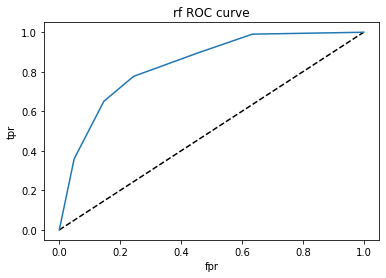

In [0]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='RF')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('rf ROC curve')
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_res,y_pred_proba)

0.8370826426710869